In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better chart styles
sns.set(style='whitegrid')

# Load your dataset
df = pd.read_csv('investments_VC.csv', encoding='ISO-8859-1')

# Quick overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (54294, 39)

Columns: ['permalink', 'name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


In [5]:
# Remove commas and convert funding column to numeric
df['funding_total_usd'] = df['funding_total_usd'].replace('[\$,]', '', regex=True)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')


In [6]:
# Use founded_year if available, otherwise extract from first_funding_at
df['founded_year'] = pd.to_numeric(df['founded_year'], errors='coerce')

# Optional: convert first_funding_at to datetime
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['funding_year'] = df['first_funding_at'].dt.year


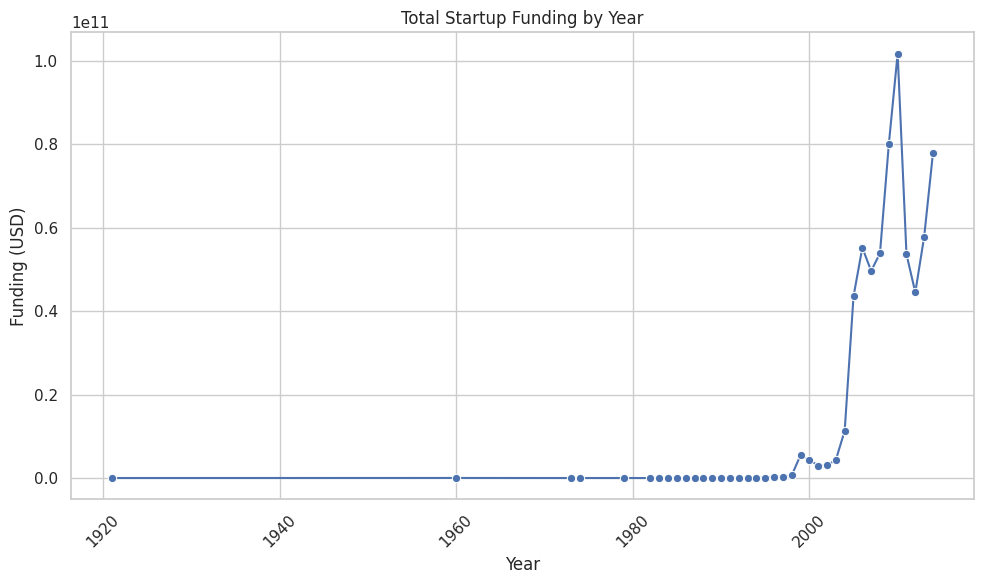

In [7]:
funding_trend = df.groupby('funding_year')['funding_total_usd'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=funding_trend, x='funding_year', y='funding_total_usd', marker='o')
plt.title("Total Startup Funding by Year")
plt.xlabel("Year")
plt.ylabel("Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-8-bdeeb1eb5ea2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sectors, y='market', x='funding_total_usd', palette='Blues_d')


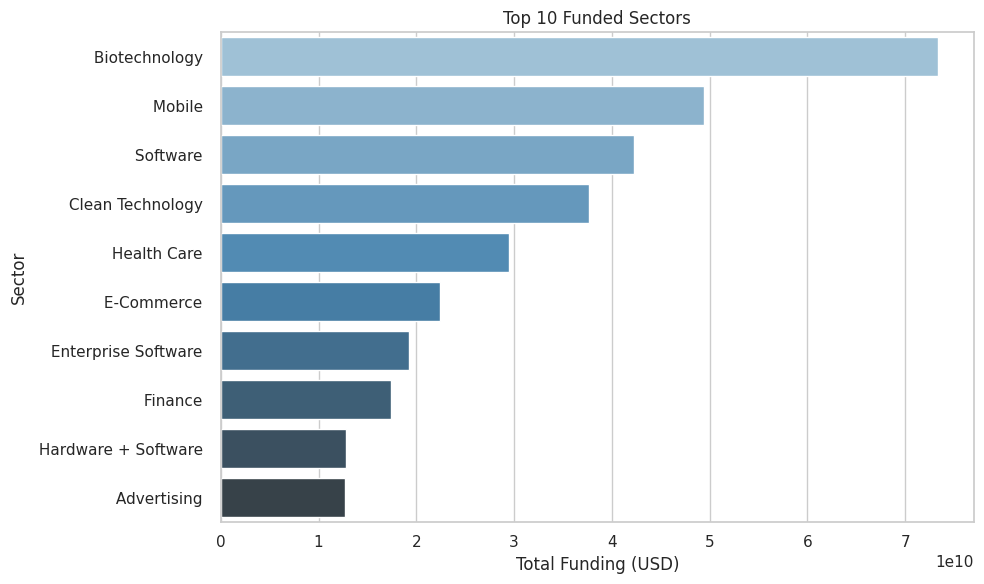

In [8]:
top_sectors = df.groupby('market')['funding_total_usd'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sectors, y='market', x='funding_total_usd', palette='Blues_d')
plt.title("Top 10 Funded Sectors")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


<ipython-input-9-ff699be4ce08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='country_code', y='funding_total_usd', palette='viridis')


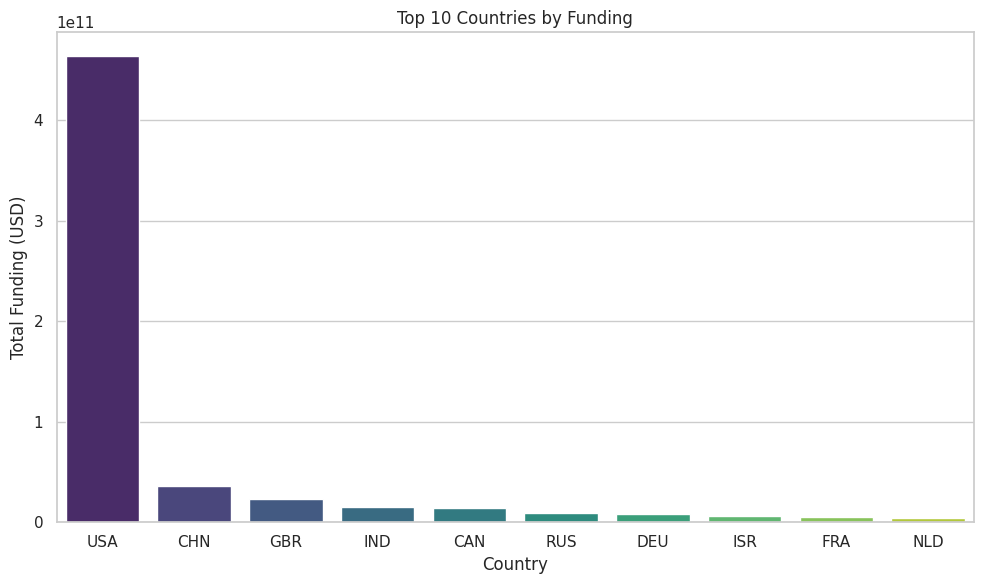

In [9]:
top_countries = df.groupby('country_code')['funding_total_usd'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='country_code', y='funding_total_usd', palette='viridis')
plt.title("Top 10 Countries by Funding")
plt.xlabel("Country")
plt.ylabel("Total Funding (USD)")
plt.tight_layout()
plt.show()


<ipython-input-10-92cf8962ed93>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=round_sums.index, y=round_sums.values, palette='Set2')


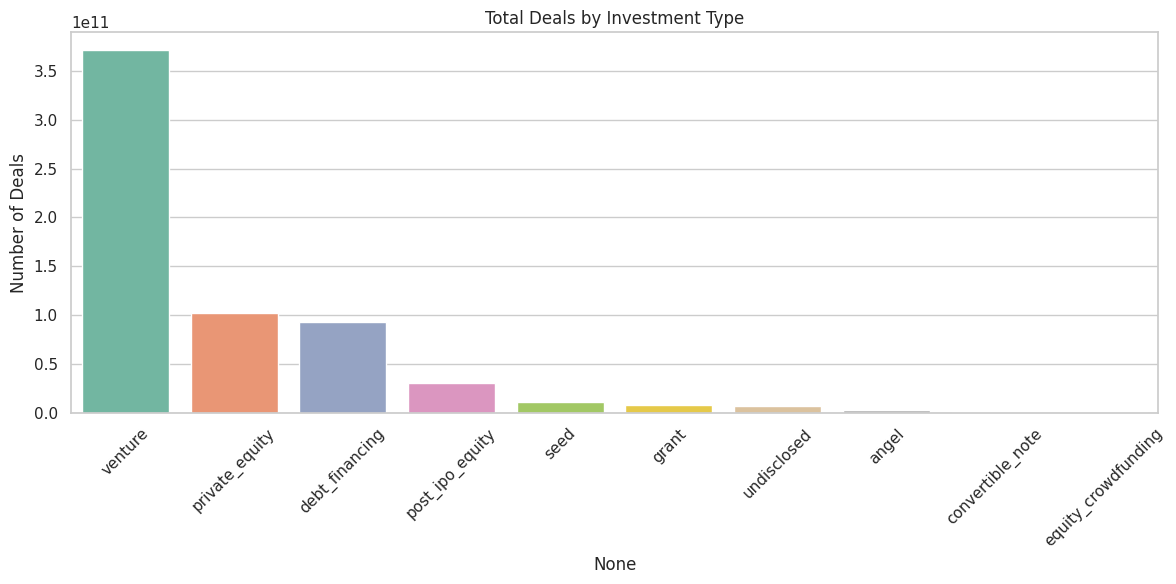

In [10]:
round_cols = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
              'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity']

round_sums = df[round_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=round_sums.index, y=round_sums.values, palette='Set2')
plt.title("Total Deals by Investment Type")
plt.ylabel("Number of Deals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-11-818f3b75e734>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='funding_total_usd', y='city', palette='crest')


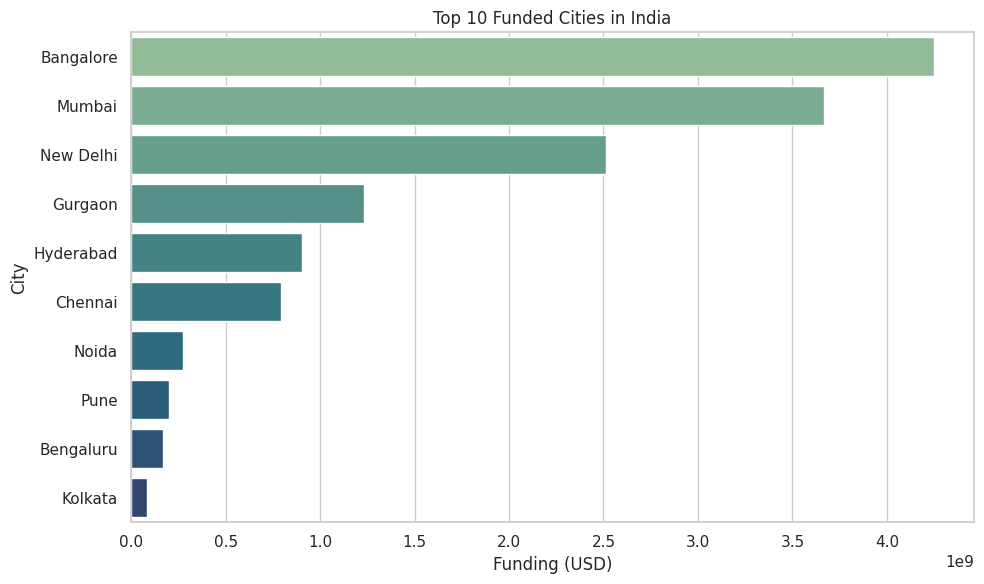

In [11]:
indian_df = df[df['country_code'] == 'IND']

top_cities = indian_df.groupby('city')['funding_total_usd'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='funding_total_usd', y='city', palette='crest')
plt.title("Top 10 Funded Cities in India")
plt.xlabel("Funding (USD)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


<ipython-input-12-92c195b353d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, y='name', x='funding_total_usd', palette='flare')


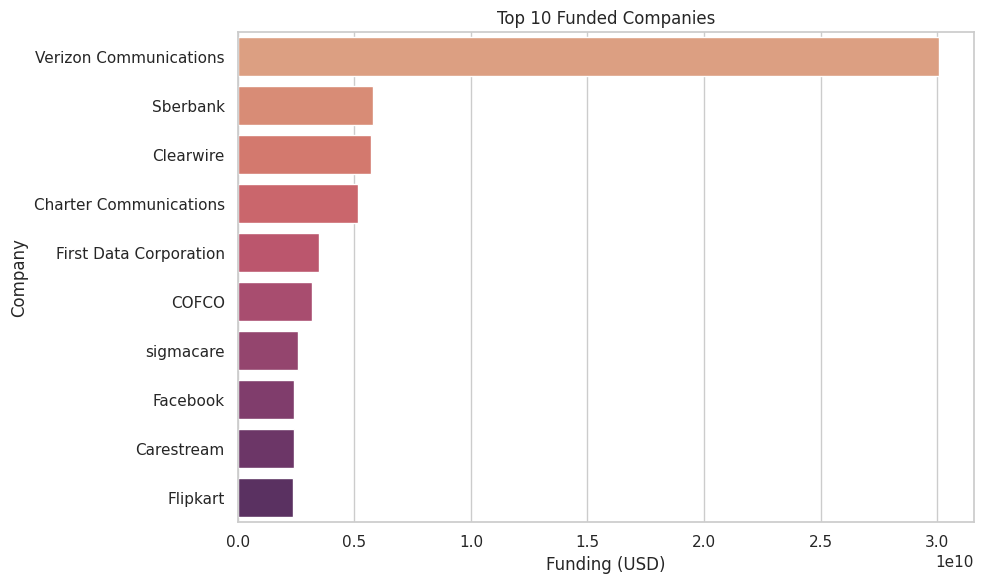

In [12]:
top_companies = df[['name', 'funding_total_usd']].dropna().sort_values(by='funding_total_usd', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies, y='name', x='funding_total_usd', palette='flare')
plt.title("Top 10 Funded Companies")
plt.xlabel("Funding (USD)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


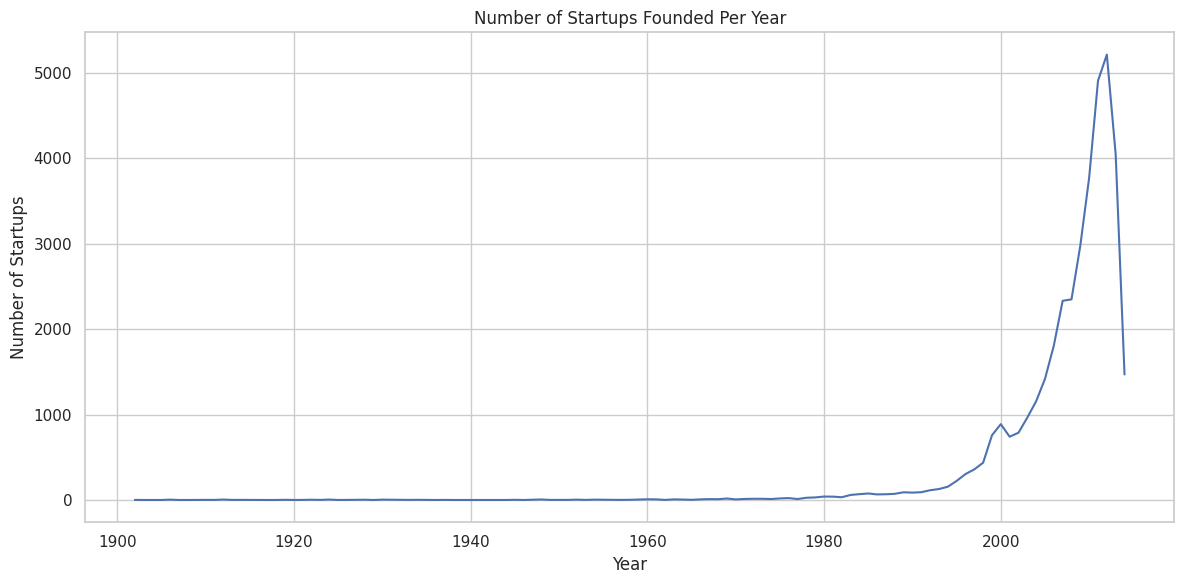

In [13]:
founding_trend = df['founded_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=founding_trend.index, y=founding_trend.values)
plt.title("Number of Startups Founded Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Startups")
plt.tight_layout()
plt.show()


<ipython-input-14-d349f993cf54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='pastel')


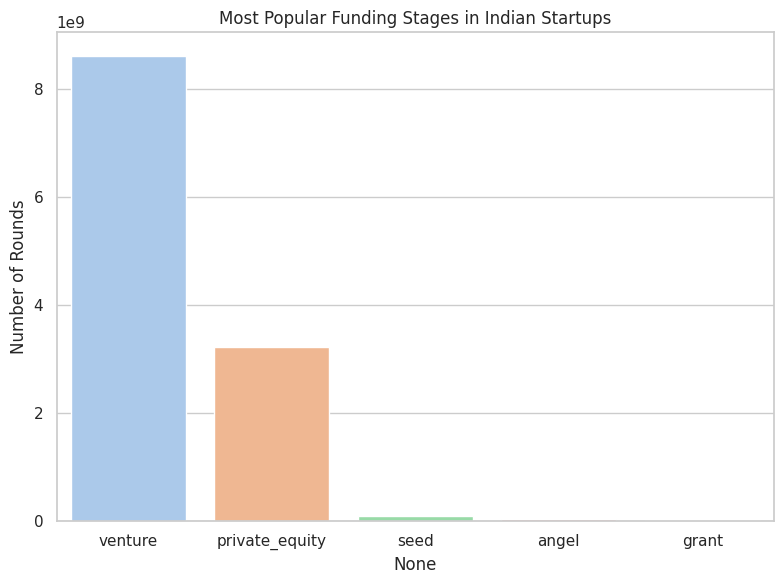

In [14]:
indian_rounds = indian_df[['seed', 'venture', 'angel', 'grant', 'private_equity']]
stage_counts = indian_rounds.sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='pastel')
plt.title("Most Popular Funding Stages in Indian Startups")
plt.ylabel("Number of Rounds")
plt.tight_layout()
plt.show()
